In [1]:
import pandas as pd
import numpy as np
import scipy.io as sio
import os
import re
import matplotlib.pyplot as plt
import source.transform_data as trs
from pathlib import Path

In [2]:
os.getcwd()

'/app'

## Check samples of variables and data points comparing data from csv-files and .mat files:

### Choose experiment phase (T2 or T3):

In [3]:
file_path_folder = 'Data/'
file_path_last_part = 'locomotion_metrics_T3.mat'

In [4]:
path_to_data = Path('Data')

### Select subject:

In [5]:
os.listdir(path_to_data)

['Sub_07_locomotion_metrics_T3.mat',
 'Sub_21_locomotion_metrics_T2.mat',
 'Sub_21_locomotion_metrics_T3.mat',
 'Sub_07_locomotion_metrics_T2.mat',
 'Sub_43_locomotion_metrics_T3.mat',
 'Sub_34_locomotion_metrics_T3.mat',
 'Sub_34_locomotion_metrics_T2.mat',
 'Sub_43_locomotion_metrics_T2.mat',
 'Sub_44_locomotion_metrics_T2.mat',
 'Sub_15_locomotion_metrics_T3.mat',
 'Sub_33_locomotion_metrics_T2.mat',
 'Sub_33_locomotion_metrics_T3.mat',
 'Sub_15_locomotion_metrics_T2.mat',
 'Sub_44_locomotion_metrics_T3.mat',
 'Sub_26_locomotion_metrics_T3.mat',
 'test_text.txt',
 'Sub_08_locomotion_metrics_T3.mat',
 'Sub_08_locomotion_metrics_T2.mat',
 'Sub_26_locomotion_metrics_T2.mat',
 'Sub_23_locomotion_metrics_T2.mat',
 'Sub_05_locomotion_metrics_T3.mat',
 'data_table_wide.csv',
 'Sub_05_locomotion_metrics_T2.mat',
 'Sub_23_locomotion_metrics_T3.mat',
 'Sub_18_locomotion_metrics_T3.mat',
 'Sub_49_locomotion_metrics_T2.mat',
 'Sub_36_locomotion_metrics_T3.mat',
 'Sub_10_locomotion_metrics_T2.ma

In [6]:
file_path_subject = 'Sub_15_'

### Define file path for .mat file:

In [7]:
file_path = file_path_folder + file_path_subject + \
file_path_last_part

In [8]:
file_path

'Data/Sub_15_locomotion_metrics_T3.mat'

### Load .mat file of individual subject: 

In [9]:
mat_contents = sio.loadmat(file_path)

### Load data from csv-files:

In [10]:
data_wide = pd.read_csv(path_to_data/'data_table_wide.csv', index_col=None)

In [11]:
data_long = pd.read_csv(path_to_data/'data_table_long.csv', index_col=None)

In [12]:
data_wide.head(5)

,file_name,subject,exp_phase_id,exp_phase_descr,exp_phase_one_hot,time_stamps,time_stamps_hours,morning_afternoon,WB_time,Ngait_cycles,...,cadence_mean,speed_mean,speed_std,slength_mean,slength_std,gtime_mean,gtime_std,speed_CV,slength_CV,gtime_CV
0,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,2446.175,0.679493,1,13.620,5,...,90.052297,0.114202,0.165721,0.328005,0.468925,2.672000,1.991565,145.112442,142.962864,74.534631
1,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,2591.750,0.719931,1,7.375,5,...,103.294641,0.151023,0.091897,0.187907,0.121712,1.404000,0.694122,60.849881,64.772713,49.438871
2,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4369.050,1.213625,1,15.795,6,...,52.500305,0.280798,0.048643,0.677725,0.151779,2.548333,0.736347,17.322989,22.395437,28.895232
3,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4397.700,1.221583,1,33.805,15,...,61.260436,0.285874,0.116798,0.606137,0.250215,2.239333,0.723454,40.856607,41.280249,32.306655
4,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4441.550,1.233764,1,11.875,5,...,58.469707,0.274018,0.064256,0.566209,0.224203,2.258000,0.676042,23.449770,39.597273,29.939849


In [13]:
data_long.head(5)

,file_name,subject,exp_phase_id,exp_phase_descr,exp_phase_one_hot,time_stamps,time_stamps_hours,morning_afternoon,variable,value
0,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,2446.175,0.679493,1,WB_time,13.620
1,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,2591.750,0.719931,1,WB_time,7.375
2,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4369.050,1.213625,1,WB_time,15.795
3,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4397.700,1.221583,1,WB_time,33.805
4,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4441.550,1.233764,1,WB_time,11.875


### Check number of data points (data dimensions): 

#### Select data for subject in question from data wide:

In [14]:
file_name = file_path_subject + file_path_last_part

In [15]:
#data_wide_subj = data_wide[data_wide['subject']==file_name]
data_wide_subj = data_wide[data_wide['file_name']==file_name]

In [16]:
data_wide_subj.reset_index(drop=True, inplace=True)

In [17]:
data_wide_subj.shape[0]

471

#### Compare number of data points from .mat file and from data-wide csv file for subject in question:

In [18]:
len(mat_contents['results'][0][0][4][0]) == data_wide_subj.shape[0]

True

#### Select data for subject in question from data long:

In [19]:
#data_long_subj = data_long[data_long['subject']==file_name]
data_long_subj = data_long[data_long['file_name']==file_name]

In [20]:
data_long_subj.reset_index(drop=True, inplace=True)

In [21]:
data_long_subj.head()

,file_name,subject,exp_phase_id,exp_phase_descr,exp_phase_one_hot,time_stamps,time_stamps_hours,morning_afternoon,variable,value
0,Sub_15_locomotion_metrics_T3.mat,Sub_15_locomotion_metrics_T3,T3,Test phase: after rehab training.,1,745.900,0.207194,1,WB_time,26.305
1,Sub_15_locomotion_metrics_T3.mat,Sub_15_locomotion_metrics_T3,T3,Test phase: after rehab training.,1,1017.425,0.282618,1,WB_time,13.640
2,Sub_15_locomotion_metrics_T3.mat,Sub_15_locomotion_metrics_T3,T3,Test phase: after rehab training.,1,1035.525,0.287646,1,WB_time,13.915
3,Sub_15_locomotion_metrics_T3.mat,Sub_15_locomotion_metrics_T3,T3,Test phase: after rehab training.,1,1422.950,0.395264,1,WB_time,14.025
4,Sub_15_locomotion_metrics_T3.mat,Sub_15_locomotion_metrics_T3,T3,Test phase: after rehab training.,1,1446.625,0.401840,1,WB_time,11.390


In [22]:
print(file_name)
print(set(data_long_subj.exp_phase_id))
print(set(data_long_subj.exp_phase_descr))

Sub_15_locomotion_metrics_T3.mat
{'T3'}
{'Test phase: after rehab training.'}


#### Compare number of data points from .mat file and from data-long csv file for subject in question:

In [23]:
var_list = list(set(data_long_subj['variable']))
var_list

['gait_timestamps',
 'gtime_mean',
 'WB_time',
 'speed_std',
 'Ngait_cycles',
 'slength_mean',
 'cadence_mean',
 'speed_mean',
 'gtime_CV',
 'speed_CV',
 'slength_std',
 'slength_CV',
 'gtime_std']

In [24]:
data_long_subj[data_long_subj['variable']=='gtime_CV'].shape

(471, 10)

In [25]:
len(mat_contents['results'][0][0][4][0])

471

#### Check if all variables have the same length (does not apply to nfoot and steps_tot): 

In [26]:
number_of_variables = data_wide.shape[1] - 7
var_lengths_mat = []
var_lengths_csv = []
for var_selection_index in range(2, number_of_variables+1):
    variable_to_test = mat_contents['results'][0][0].dtype.descr[var_selection_index][0]
    print(variable_to_test)
    variable_from_mat = mat_contents['results'][0][0][var_selection_index][0]
    var_length_from_mat = len(variable_from_mat)
    var_selection_bools = data_long_subj['variable']==variable_to_test
    slice_from_long_csv = data_long_subj[var_selection_bools]
    variable_from_long_csv = slice_from_long_csv['value']
    var_length_from_long_csv = len(variable_from_long_csv)
    var_lengths_mat.append(var_length_from_mat)
    var_lengths_csv.append(var_length_from_long_csv)
    

WB_time
Ngait_cycles
gait_timestamps
cadence_mean
speed_mean
speed_std
slength_mean
slength_std
gtime_mean
gtime_std
speed_CV
slength_CV
gtime_CV


In [27]:
var_lengths_mat

[471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471]

In [28]:
var_lengths_csv

[471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471, 471]

### Check if values are identical:

#### Have a look at variables loaded from the two different files are identical: 

Select variable:

In [29]:
var_selection_index = 8

Select data for selected variable from .mat file:

In [30]:
variable_to_test = mat_contents['results'][0][0].dtype.descr[var_selection_index][0]
variable_to_test

'slength_mean'

In [31]:
variable_from_mat = mat_contents['results'][0][0][var_selection_index][0]

Select data for selected variable from data-wide csv file:

In [32]:
variable_from_wide_csv = data_wide_subj[variable_to_test]

In [33]:
variable_from_wide_csv[0:7]

0    0.738493
1    0.729375
2    0.413180
3    0.590706
4    0.745941
5    0.732461
6    0.687535
Name: slength_mean, dtype: float64

In [34]:
variable_from_mat[0:7]

array([0.73849313, 0.72937477, 0.41318023, 0.59070553, 0.74594088,
       0.73246131, 0.6875352 ])

#### Loop through all variables and check if they are the same in the data loaded from the mat and the wide csv file:

In [35]:
number_of_variables = data_wide.shape[1] - 7
bools_to_test = []
for var_selection_index in range(2, number_of_variables+1):
    variable_to_test = mat_contents['results'][0][0].dtype.descr[var_selection_index][0]
    print(variable_to_test)
    variable_from_mat = mat_contents['results'][0][0][var_selection_index][0]
    variable_from_wide_csv = data_wide_subj[variable_to_test]
    bools_to_test.append(np.array_equal(np.int64(variable_from_mat), np.int64(variable_from_wide_csv)))

WB_time
Ngait_cycles
gait_timestamps
cadence_mean
speed_mean
speed_std
slength_mean
slength_std
gtime_mean
gtime_std
speed_CV
slength_CV
gtime_CV


Expected value is True:

In [36]:
sum(bools_to_test) == len(bools_to_test)

True

#### Loop through all variables and check if they are the same in the data loaded from the mat and the long csv file:

In [37]:
number_of_variables = data_wide.shape[1] - 7
bools_to_test = []
for var_selection_index in range(2, number_of_variables+1):
    variable_to_test = mat_contents['results'][0][0].dtype.descr[var_selection_index][0]
    print(variable_to_test)
    variable_from_mat = mat_contents['results'][0][0][var_selection_index][0]
    var_selection_bools = data_long_subj['variable']==variable_to_test
    slice_from_long_csv = data_long_subj[var_selection_bools]
    variable_from_long_csv = slice_from_long_csv['value']
    bools_to_test.append(np.array_equal(np.int64(variable_from_mat), np.int64(variable_from_long_csv)))
    

WB_time
Ngait_cycles
gait_timestamps
cadence_mean
speed_mean
speed_std
slength_mean
slength_std
gtime_mean
gtime_std
speed_CV
slength_CV
gtime_CV


Expected value is True:

In [38]:
sum(bools_to_test) == len(bools_to_test)

True

In [39]:
data_wide.value_counts('exp_phase_id')

exp_phase_id
T2    31796
T3    25828
Name: count, dtype: int64

In [40]:
data_wide.value_counts('exp_phase_descr')

exp_phase_descr
Control phase: before rehab training.    31796
Test phase: after rehab training.        25828
Name: count, dtype: int64

In [41]:
data_wide.columns

Index(['file_name', 'subject', 'exp_phase_id', 'exp_phase_descr',
       'exp_phase_one_hot', 'time_stamps', 'time_stamps_hours',
       'morning_afternoon', 'WB_time', 'Ngait_cycles', 'gait_timestamps',
       'cadence_mean', 'speed_mean', 'speed_std', 'slength_mean',
       'slength_std', 'gtime_mean', 'gtime_std', 'speed_CV', 'slength_CV',
       'gtime_CV'],
      dtype='object')

In [42]:
data_wide.head(5)

,file_name,subject,exp_phase_id,exp_phase_descr,exp_phase_one_hot,time_stamps,time_stamps_hours,morning_afternoon,WB_time,Ngait_cycles,...,cadence_mean,speed_mean,speed_std,slength_mean,slength_std,gtime_mean,gtime_std,speed_CV,slength_CV,gtime_CV
0,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,2446.175,0.679493,1,13.620,5,...,90.052297,0.114202,0.165721,0.328005,0.468925,2.672000,1.991565,145.112442,142.962864,74.534631
1,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,2591.750,0.719931,1,7.375,5,...,103.294641,0.151023,0.091897,0.187907,0.121712,1.404000,0.694122,60.849881,64.772713,49.438871
2,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4369.050,1.213625,1,15.795,6,...,52.500305,0.280798,0.048643,0.677725,0.151779,2.548333,0.736347,17.322989,22.395437,28.895232
3,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4397.700,1.221583,1,33.805,15,...,61.260436,0.285874,0.116798,0.606137,0.250215,2.239333,0.723454,40.856607,41.280249,32.306655
4,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4441.550,1.233764,1,11.875,5,...,58.469707,0.274018,0.064256,0.566209,0.224203,2.258000,0.676042,23.449770,39.597273,29.939849


In [43]:
data_wide.value_counts('exp_phase_one_hot')

exp_phase_one_hot
0    31796
1    25828
Name: count, dtype: int64

In [44]:
#data_wide[data_wide.subject == file_name].shape
data_wide[data_wide.file_name == file_name].shape

(471, 21)

In [45]:
mat_contents['results'][0][0].dtype.descr[0]

('nfoot', '|O')

In [46]:
print(len(mat_contents['results'][0][0][0][0]))

7


In [47]:
print(len(mat_contents['results'][0][0][1][0]))

7


In [48]:
data_wide.head()

,file_name,subject,exp_phase_id,exp_phase_descr,exp_phase_one_hot,time_stamps,time_stamps_hours,morning_afternoon,WB_time,Ngait_cycles,...,cadence_mean,speed_mean,speed_std,slength_mean,slength_std,gtime_mean,gtime_std,speed_CV,slength_CV,gtime_CV
0,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,2446.175,0.679493,1,13.620,5,...,90.052297,0.114202,0.165721,0.328005,0.468925,2.672000,1.991565,145.112442,142.962864,74.534631
1,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,2591.750,0.719931,1,7.375,5,...,103.294641,0.151023,0.091897,0.187907,0.121712,1.404000,0.694122,60.849881,64.772713,49.438871
2,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4369.050,1.213625,1,15.795,6,...,52.500305,0.280798,0.048643,0.677725,0.151779,2.548333,0.736347,17.322989,22.395437,28.895232
3,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4397.700,1.221583,1,33.805,15,...,61.260436,0.285874,0.116798,0.606137,0.250215,2.239333,0.723454,40.856607,41.280249,32.306655
4,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4441.550,1.233764,1,11.875,5,...,58.469707,0.274018,0.064256,0.566209,0.224203,2.258000,0.676042,23.449770,39.597273,29.939849


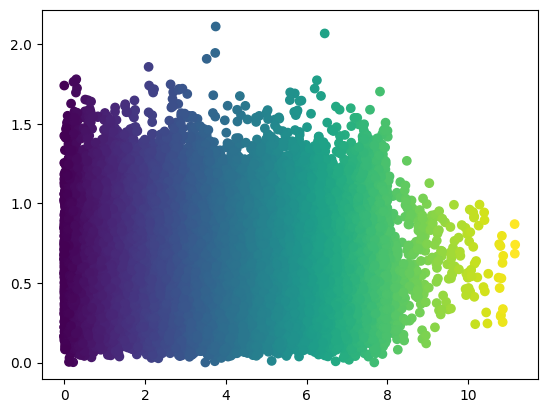

In [49]:
plt.scatter(x='time_stamps_hours', y='speed_mean', c= 'time_stamps_hours', data=data_wide)


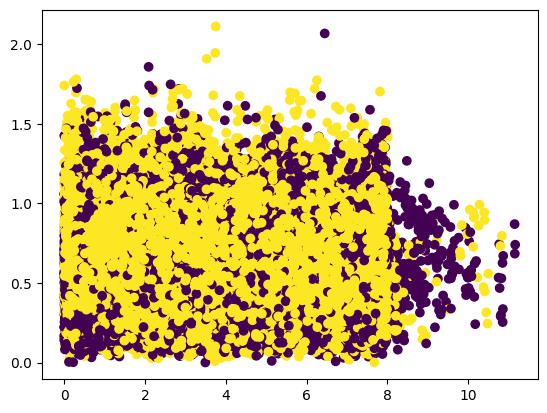

In [50]:
plt.scatter(x='time_stamps_hours', y='speed_mean', c= 'exp_phase_one_hot', data=data_wide)


In [51]:
data_wide.value_counts('exp_phase_id')

exp_phase_id
T2    31796
T3    25828
Name: count, dtype: int64

In [52]:
data_wide.value_counts('exp_phase_descr')

exp_phase_descr
Control phase: before rehab training.    31796
Test phase: after rehab training.        25828
Name: count, dtype: int64

In [53]:
data_wide.value_counts('exp_phase_one_hot')

exp_phase_one_hot
0    31796
1    25828
Name: count, dtype: int64

<Figure size 4200x4000 with 0 Axes>

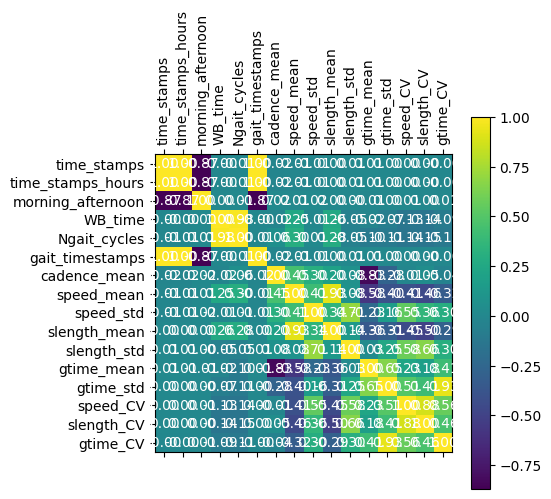

In [54]:
data_wide_num = data_wide.iloc[:,5:].copy()

corr_matrix = data_wide_num.corr()

plt.figure(figsize=(42, 40))
 
# Plot the matrix
plt.matshow(corr_matrix, cmap="viridis")
 
# Set ticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation="vertical")
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
 
# Add color bar
plt.colorbar()
 
# Add text annotations
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="w")
 
plt.show()

In [55]:
corr_matrix

,time_stamps,time_stamps_hours,morning_afternoon,WB_time,Ngait_cycles,gait_timestamps,cadence_mean,speed_mean,speed_std,slength_mean,slength_std,gtime_mean,gtime_std,speed_CV,slength_CV,gtime_CV
time_stamps,1.000000,1.000000,-0.869767,-0.004326,-0.006347,1.000000,-0.019614,-0.009977,-0.009688,0.003712,0.005133,0.008761,0.000244,0.001411,0.000971,-0.000959
time_stamps_hours,1.000000,1.000000,-0.869767,-0.004326,-0.006347,1.000000,-0.019614,-0.009977,-0.009688,0.003712,0.005133,0.008761,0.000244,0.001411,0.000971,-0.000959
morning_afternoon,-0.869767,-0.869767,1.000000,0.003299,0.005551,-0.869767,0.016875,0.012080,0.015601,0.002811,0.003329,-0.005719,0.004475,0.005201,0.003920,0.005851
WB_time,-0.004326,-0.004326,0.003299,1.000000,0.984880,-0.004326,-0.018362,0.251654,-0.005798,0.261096,-0.049695,-0.020557,-0.067330,-0.133946,-0.141290,-0.088693
Ngait_cycles,-0.006347,-0.006347,0.005551,0.984880,1.000000,-0.006347,0.058274,0.296216,0.014100,0.279691,-0.049641,-0.100005,-0.108643,-0.144429,-0.145782,-0.111879
gait_timestamps,1.000000,1.000000,-0.869767,-0.004326,-0.006347,1.000000,-0.019614,-0.009977,-0.009688,0.003712,0.005133,0.008761,0.000244,0.001411,0.000971,-0.000959
cadence_mean,-0.019614,-0.019614,0.016875,-0.018362,0.058274,-0.019614,1.000000,0.452003,0.301917,0.201731,0.077958,-0.830789,-0.277777,-0.009375,0.049277,-0.038959
speed_mean,-0.009977,-0.009977,0.012080,0.251654,0.296216,-0.009977,0.452003,1.000000,0.414856,0.926412,0.084998,-0.575080,-0.396692,-0.406818,-0.459155,-0.316480
speed_std,-0.009688,-0.009688,0.015601,-0.005798,0.014100,-0.009688,0.301917,0.414856,1.000000,0.343343,0.706472,-0.230335,0.160463,0.545391,0.363136,0.298552
slength_mean,0.003712,0.003712,0.002811,0.261096,0.279691,0.003712,0.201731,0.926412,0.343343,1.000000,0.144653,-0.355429,-0.313140,-0.445127,-0.500638,-0.292187


In [56]:
data_wide_before_rh = data_wide[data_wide.exp_phase_id == 'T2'].copy()
data_wide_after_rh = data_wide[data_wide.exp_phase_id == 'T3'].copy()

array([[<Axes: title={'center': 'time_stamps_hours'}>]], dtype=object)

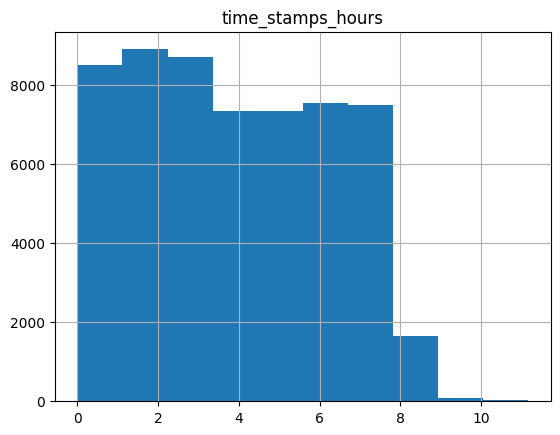

In [57]:
data_wide.hist('time_stamps_hours')

array([[<Axes: title={'center': 'time_stamps_hours'}>]], dtype=object)

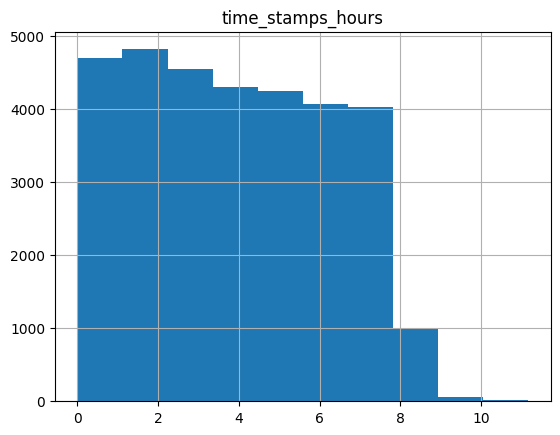

In [58]:
data_wide_before_rh.hist('time_stamps_hours')

array([[<Axes: title={'center': 'time_stamps_hours'}>]], dtype=object)

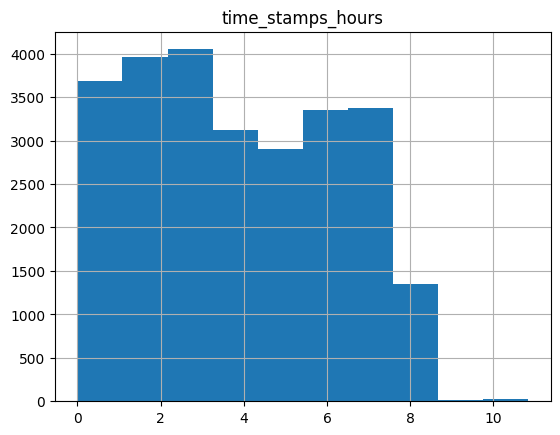

In [59]:
data_wide_after_rh.hist('time_stamps_hours')

In [60]:
print(data_wide_before_rh.shape)
print(data_wide_after_rh.shape)

(31796, 21)
(25828, 21)


In [61]:
print(len(set(data_wide_before_rh.file_name)))
print(len(set(data_wide_after_rh.file_name)))

43
43


In [62]:
data_wide.head()

,file_name,subject,exp_phase_id,exp_phase_descr,exp_phase_one_hot,time_stamps,time_stamps_hours,morning_afternoon,WB_time,Ngait_cycles,...,cadence_mean,speed_mean,speed_std,slength_mean,slength_std,gtime_mean,gtime_std,speed_CV,slength_CV,gtime_CV
0,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,2446.175,0.679493,1,13.620,5,...,90.052297,0.114202,0.165721,0.328005,0.468925,2.672000,1.991565,145.112442,142.962864,74.534631
1,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,2591.750,0.719931,1,7.375,5,...,103.294641,0.151023,0.091897,0.187907,0.121712,1.404000,0.694122,60.849881,64.772713,49.438871
2,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4369.050,1.213625,1,15.795,6,...,52.500305,0.280798,0.048643,0.677725,0.151779,2.548333,0.736347,17.322989,22.395437,28.895232
3,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4397.700,1.221583,1,33.805,15,...,61.260436,0.285874,0.116798,0.606137,0.250215,2.239333,0.723454,40.856607,41.280249,32.306655
4,Sub_01_locomotion_metrics_T2.mat,Sub_01_locomotion_metrics_T2,T2,Control phase: before rehab training.,0,4441.550,1.233764,1,11.875,5,...,58.469707,0.274018,0.064256,0.566209,0.224203,2.258000,0.676042,23.449770,39.597273,29.939849


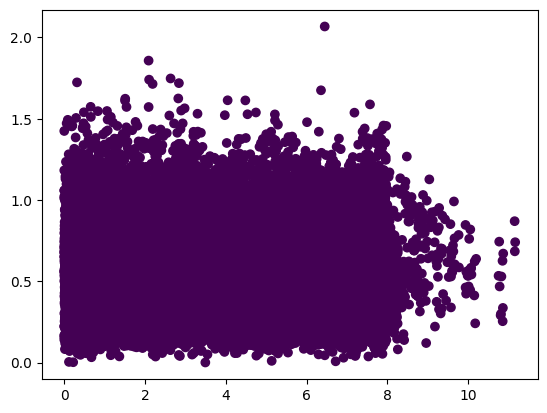

In [63]:
plt.scatter(x='time_stamps_hours', y='speed_mean', c= 'exp_phase_one_hot', data=data_wide_before_rh)


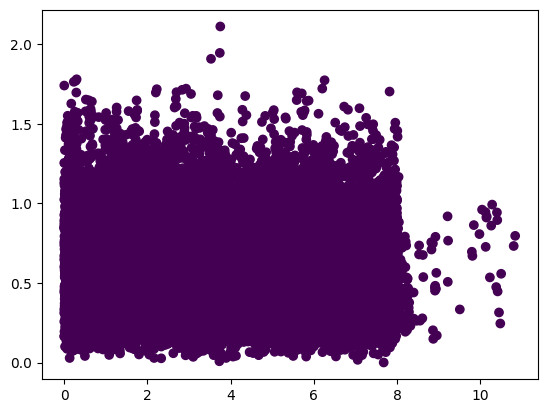

In [64]:
plt.scatter(x='time_stamps_hours', y='speed_mean', c= 'exp_phase_one_hot', data=data_wide_after_rh)